# C964 Capstone - Stroke Prediction Model

## CSV file is loaded using Pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

Some values from the dataset can be seen below. More or less values can be seen if desired by changing the number within the parentheses.

In [4]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The NaN values in the bmi column are set to the mean value of the column. This isn't the best way to deal with NaN values, but due to how limited the dataset is, I believe it is better than removing those values all together.

In [5]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

Some values from the updated dataset can be seen below. More or less values can be seen if desired by changing the number within the parentheses.

In [6]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Visualizing the Dataset

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Frequency')]

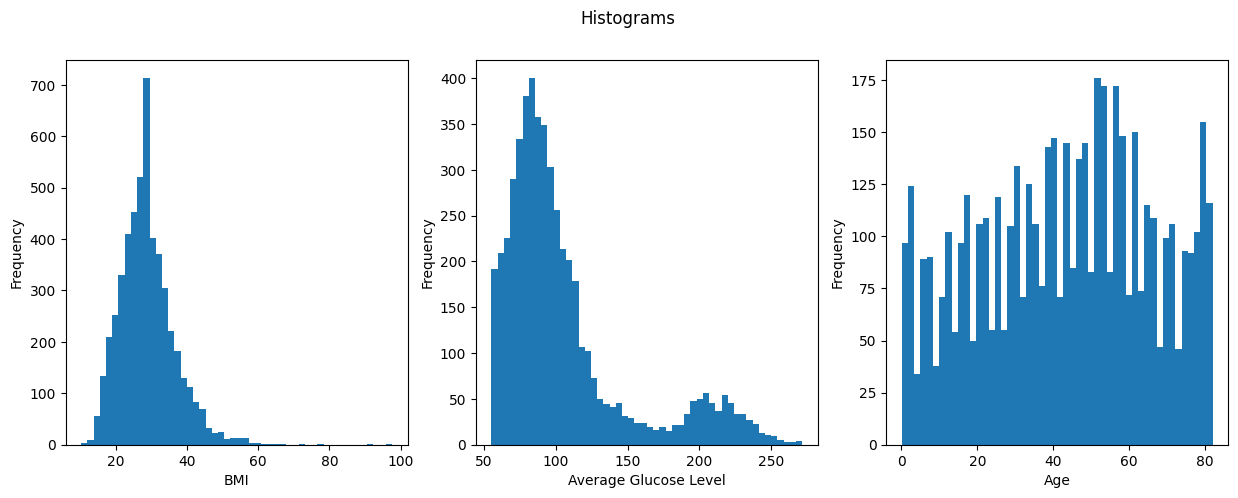

In [59]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                ncols=3,
                                figsize=(40, 10))

fig.set_size_inches(15, 5)
fig.suptitle("Histograms")

num_bins = 50
    
n, bins, patches = ax0.hist(df["bmi"], num_bins)
n1, bins1, patches1 = ax1.hist(df["avg_glucose_level"], num_bins)
n2, bins2, patches2 = ax2.hist(df["age"], num_bins)

ax0.set(xlabel="BMI",
        ylabel="Frequency")

ax1.set(xlabel="Average Glucose Level",
        ylabel="Frequency")

ax2.set(xlabel="Age",
        ylabel="Frequency")


[Text(0.5, 1.0, 'Age and BMI'), Text(0.5, 0, 'Age'), Text(0, 0.5, 'BMI')]

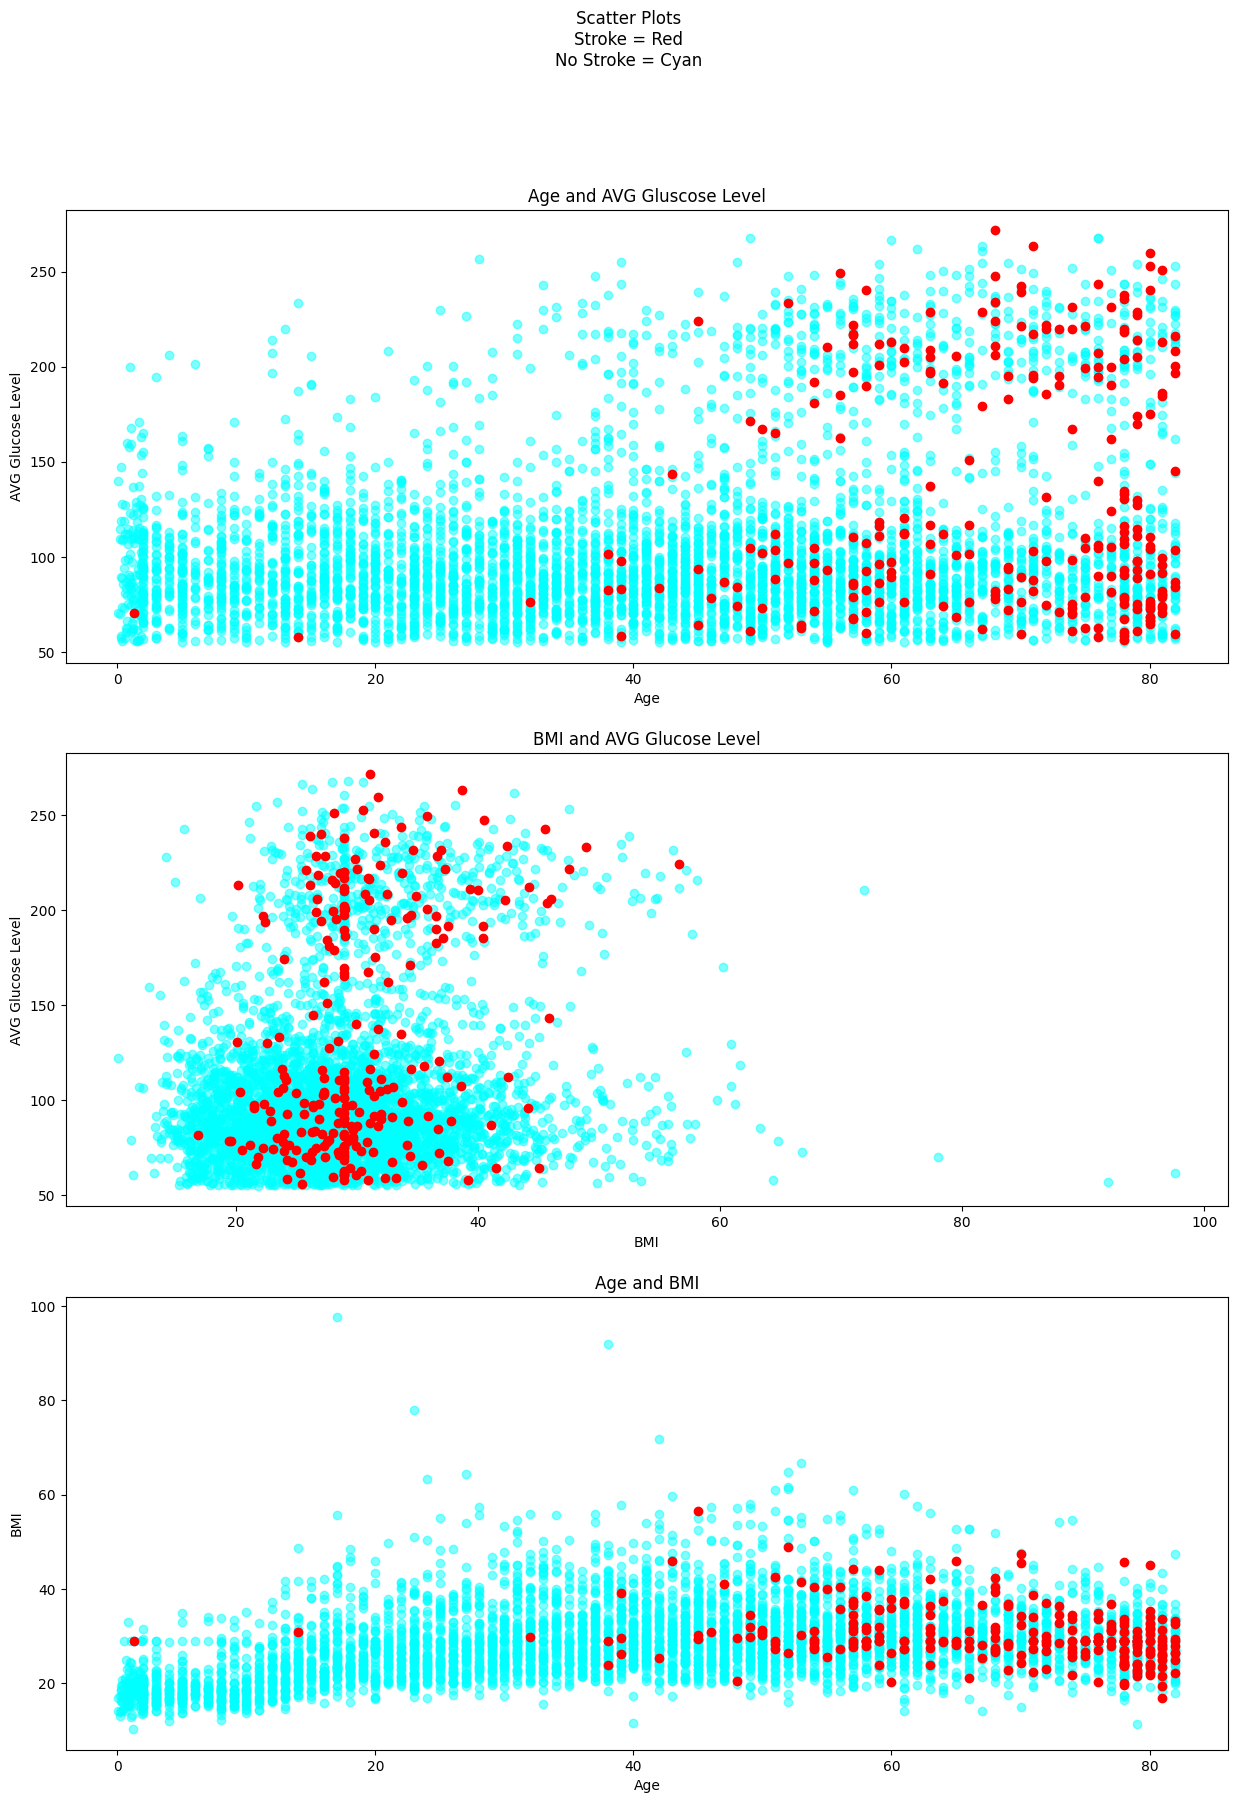

In [68]:
fig, (ax, ax1, ax2) = plt.subplots(nrows=3,
                                   ncols=1)

fig.set_size_inches(15, 20)
fig.suptitle("Scatter Plots\nStroke = Red\nNo Stroke = Cyan")

positive = df.loc[df["stroke"] == 1]
negative = df.loc[df["stroke"] == 0]

ax.scatter(x=negative["age"],
           y=negative["avg_glucose_level"],
           c="cyan",
           alpha=0.5)

ax.scatter(x=positive["age"],
           y=positive["avg_glucose_level"],
           c="red",
           alpha=1)

ax.set(title="Age and AVG Gluscose Level",
       xlabel="Age",
       ylabel="AVG Glucose Level")

ax1.scatter(x=negative["bmi"],
            y=negative["avg_glucose_level"],
            c="cyan",
            alpha=0.5)

ax1.scatter(x=positive["bmi"],
            y=positive["avg_glucose_level"],
            c="red",
            alpha=1)

ax1.set(title="BMI and AVG Glucose Level",
        xlabel="BMI",
        ylabel="AVG Glucose Level")

ax2.scatter(x=negative["age"],
            y=negative["bmi"],
            c="cyan",
            alpha=0.5)

ax2.scatter(x=positive["age"],
            y=positive["bmi"],
            c="red",
            alpha=1)

ax2.set(title="Age and BMI",
        xlabel="Age",
        ylabel="BMI")

([<matplotlib.patches.Wedge at 0x7fa28b568ac0>,
 [Text(1.3999414480600014, 0.012803983898225606, 'Stroke'),
  Text(-1.0999539949631563, -0.010060266626321071, 'No Stroke')],
 [Text(0.8999623594671438, 0.008231132506002173, '0.3%\n(2)'),
  Text(-0.5999749063435398, -0.005487418159811493, '99.7%\n(684)')])

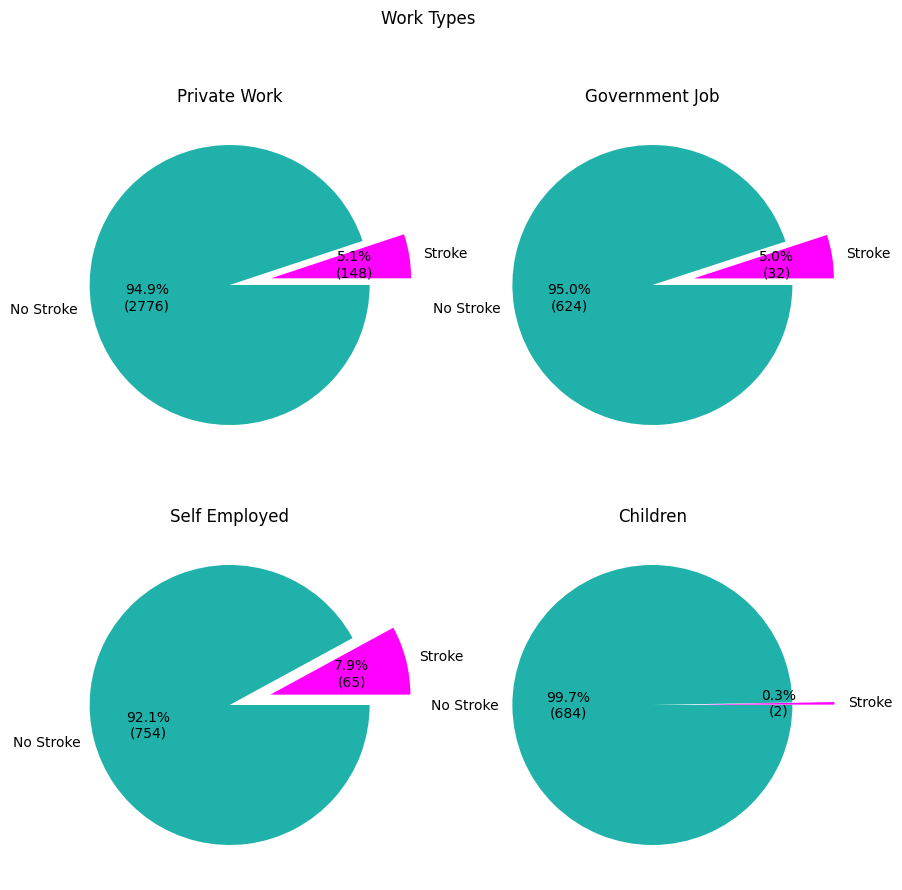

In [109]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                        ncols=2)

fig.suptitle("Work Types")
fig.set_size_inches(10, 10)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

explode = (0.3, 0)
colors = ["magenta", "lightseagreen"]

positive = df.loc[df["stroke"] == 1]
negative = df.loc[df["stroke"] == 0]

pos_private = (positive.loc[positive["work_type"] == "Private"]).shape[0]
neg_private = (negative.loc[negative["work_type"] == "Private"]).shape[0]
data = [pos_private, neg_private]
labels = ["Stroke", "No Stroke"]

ax.set_title("Private Work")
ax.pie(data,
       labels=labels,
       autopct = lambda pct: func(pct, data),
       colors = colors,
       explode = explode)

pos_govt = (positive.loc[positive["work_type"] == "Govt_job"]).shape[0]
neg_govt = (negative.loc[negative["work_type"] == "Govt_job"]).shape[0]
data2 = [pos_govt, neg_govt]

ax2.set_title("Government Job")
ax2.pie(data2,
        labels=labels,
        autopct = lambda pct: func(pct, data2),
        colors = colors,
        explode = explode)

pos_self = (positive.loc[positive["work_type"] == "Self-employed"]).shape[0]
neg_self = (negative.loc[negative["work_type"] == "Self-employed"]).shape[0]
data3 = [pos_self, neg_self]

ax3.set_title("Self Employed")
ax3.pie(data3,
        labels=labels,
        autopct = lambda pct: func(pct, data3),
        colors = colors,
        explode = explode)

pos_children = (positive.loc[positive["work_type"] == "children"]).shape[0]
neg_children = (negative.loc[negative["work_type"] == "children"]).shape[0]
data4 = [pos_children, neg_children]

ax4.set_title("Children")
ax4.pie(data4,
        labels=labels,
        autopct = lambda pct: func(pct, data4),
        colors = colors,
        explode = explode)

([<matplotlib.patches.Wedge at 0x7fa28ba0bac0>,
 [Text(1.3843961377063159, 0.20844024060587585, 'Stroke'),
  Text(-1.087739837817202, -0.16377437292020638, 'No Stroke')],
 [Text(0.889968945668346, 0.13399729753234876, '4.8%\n(89)'),
  Text(-0.5933126388093829, -0.08933147613829438, '95.2%\n(1801)')])

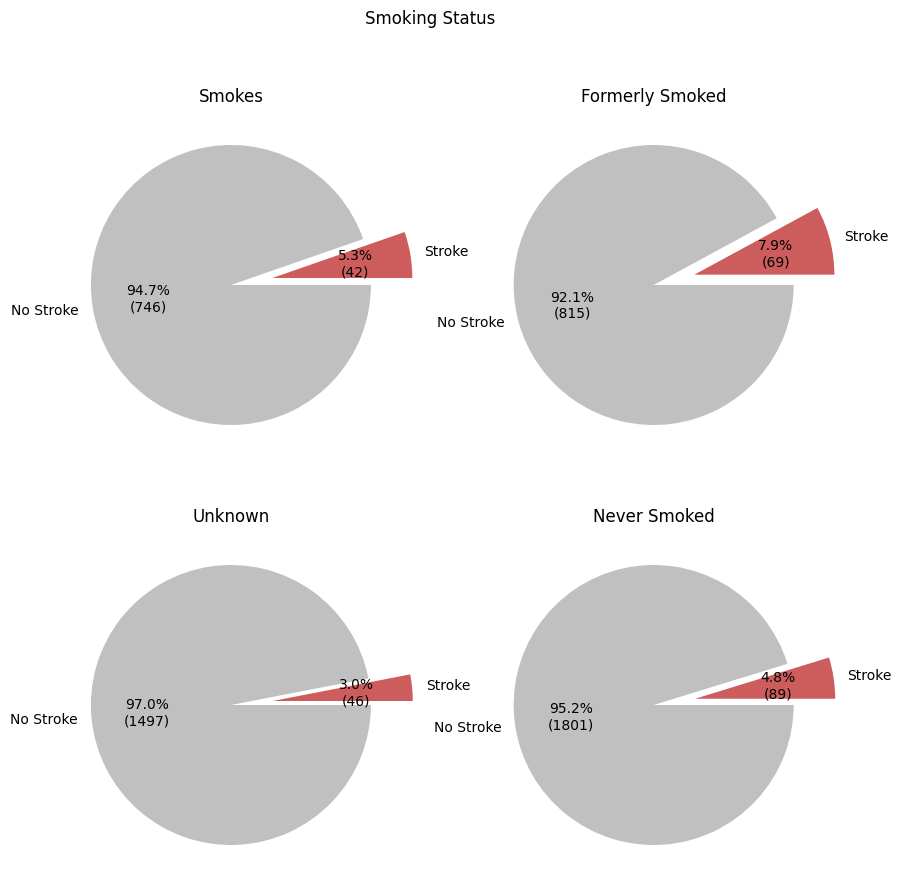

In [110]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                        ncols=2)

fig.suptitle("Smoking Status")
fig.set_size_inches(10, 10)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

explode = (0.3, 0)
colors = ["indianred", "silver"]

positive = df.loc[df["stroke"] == 1]
negative = df.loc[df["stroke"] == 0]

pos_smokes = (positive.loc[positive["smoking_status"] == "smokes"]).shape[0]
neg_smokes = (negative.loc[negative["smoking_status"] == "smokes"]).shape[0]
data = [pos_smokes, neg_smokes]
labels = ["Stroke", "No Stroke"]

ax.set_title("Smokes")
ax.pie(data,
       labels=labels,
       autopct = lambda pct: func(pct, data),
       colors = colors,
       explode = explode)

pos_form = (positive.loc[positive["smoking_status"] == "formerly smoked"]).shape[0]
neg_form = (negative.loc[negative["smoking_status"] == "formerly smoked"]).shape[0]
data2 = [pos_form, neg_form]

ax2.set_title("Formerly Smoked")
ax2.pie(data2,
        labels=labels,
        autopct = lambda pct: func(pct, data2),
        colors = colors,
        explode = explode)

pos_unknown = (positive.loc[positive["smoking_status"] == "Unknown"]).shape[0]
neg_unknown = (negative.loc[negative["smoking_status"] == "Unknown"]).shape[0]
data3 = [pos_unknown, neg_unknown]

ax3.set_title("Unknown")
ax3.pie(data3,
        labels=labels,
        autopct = lambda pct: func(pct, data3),
        colors = colors,
        explode = explode)

pos_never = (positive.loc[positive["smoking_status"] == "never smoked"]).shape[0]
neg_never = (negative.loc[negative["smoking_status"] == "never smoked"]).shape[0]
data4 = [pos_never, neg_never]

ax4.set_title("Never Smoked")
ax4.pie(data4,
        labels=labels,
        autopct = lambda pct: func(pct, data4),
        colors = colors,
        explode = explode)

([<matplotlib.patches.Wedge at 0x7fa28a4d79d0>,
 [Text(1.3891367709101732, 0.17406617047909437, 'Stroke'),
  Text(-1.091464610517004, -0.13676623848364303, 'No Stroke')],
 [Text(0.8930164955851112, 0.11189968102227496, '4.0%\n(183)'),
  Text(-0.5953443330092749, -0.07459976644562347, '96.0%\n(4428)')])

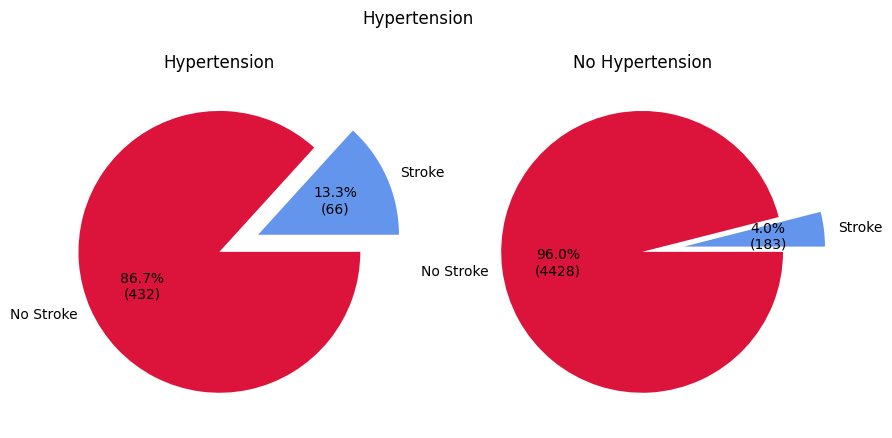

In [111]:
fig, (ax, ax2) = plt.subplots(nrows=1,
                              ncols=2)

fig.suptitle("Hypertension")
fig.set_size_inches(10, 5)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

explode = (0.3, 0)
colors = ["cornflowerblue", "crimson"]

positive = df.loc[df["stroke"] == 1]
negative = df.loc[df["stroke"] == 0]

pos_hypertension = (positive.loc[positive["hypertension"] == 1]).shape[0]
neg_hypertension = (negative.loc[negative["hypertension"] == 1]).shape[0]
data = [pos_hypertension, neg_hypertension]
labels = ["Stroke", "No Stroke"]

ax.set_title("Hypertension")
ax.pie(data,
       labels=labels,
       autopct = lambda pct: func(pct, data),
       colors = colors,
       explode = explode)

pos_nohypertension = (positive.loc[positive["hypertension"] == 0]).shape[0]
neg_nohypertension = (negative.loc[negative["hypertension"] == 0]).shape[0]
data2 = [pos_nohypertension, neg_nohypertension]

ax2.set_title("No Hypertension")
ax2.pie(data2,
        labels=labels,
        autopct = lambda pct: func(pct, data2),
        colors = colors,
        explode = explode)

([<matplotlib.patches.Wedge at 0x7fa28a8a6700>,
 [Text(0.7394414259230446, 1.0692176474548551, 'Male'),
  Text(-0.6256812065502689, -0.9047226247694924, 'Female')],
 [Text(0.4550408774911043, 0.6579800907414493, '41.3%\n(2007)'),
  Text(-0.3412806581183285, -0.4934850680560867, '58.7%\n(2852)')])

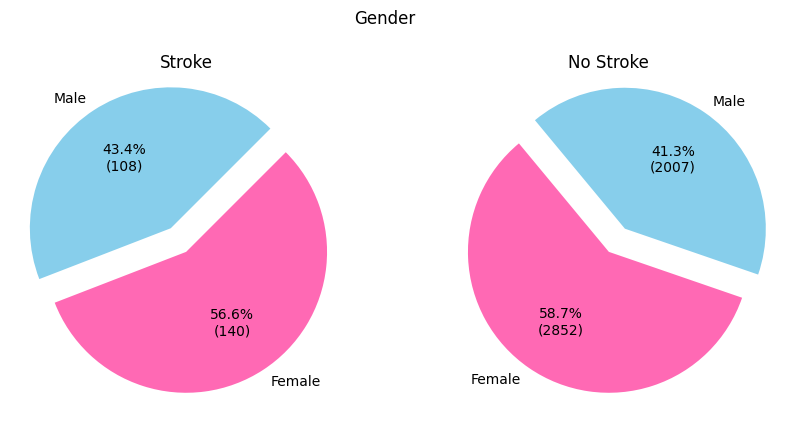

In [112]:
fig, (ax, ax2) = plt.subplots(nrows=1,
                              ncols=2)

fig.suptitle("Gender")
fig.set_size_inches(10, 5)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

explode = (0.2, 0)
colors = ["skyblue", "hotpink"]

positive = df.loc[df["stroke"] == 1]
negative = df.loc[df["stroke"] == 0]

pos_male = (positive.loc[positive["gender"] == "Male"]).shape[0]
pos_female = (positive.loc[positive["gender"] == "Female"]).shape[0]
data = [pos_male, pos_female]
labels = ["Male", "Female"]

ax.set_title("Stroke")
ax.pie(data,
       labels=labels,
       autopct = lambda pct: func(pct, data),
       colors = colors,
       startangle = 45,
       explode = explode)

neg_male = (negative.loc[negative["gender"] == "Male"]).shape[0]
neg_female = (negative.loc[negative["gender"] == "Female"]).shape[0]
data2 = [neg_male, neg_female]

ax2.set_title("No Stroke")
ax2.pie(data2,
        labels=labels,
        autopct = lambda pct: func(pct, data2),
        colors = colors,
        startangle = -19,
        explode = explode)

## Preparing The Machine Learning Model

In [42]:
#Rerun previous code if necessary(Imports, CSV)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [43]:
#Changing string values of features for numerical values.

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':3}).astype(np.uint8)

In [44]:
#Separating features from target.

X = df[["gender", "age", "hypertension", "heart_disease", "work_type", "avg_glucose_level", "bmi", "smoking_status"]]
y = df["stroke"]

In [45]:
X.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,228.69,36.600000,2
1,1,61.0,0,0,1,202.21,28.893237,0
2,0,80.0,0,1,0,105.92,32.500000,0
3,1,49.0,0,0,0,171.23,34.400000,1
4,1,79.0,1,0,1,174.12,24.000000,0


In [46]:
#Selecting RandomForest as our machine learning model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [47]:
#Separating the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Model is trained

clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluating the models accuracy

In [50]:
clf.score(X_train, y_train)

1.0

In [51]:
clf.score(X_test, y_test)

0.9383561643835616

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_preds = clf.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [53]:
confusion_matrix(y_test, y_preds)

In [54]:
accuracy_score(y_test, y_preds)

0.9383561643835616

## Using our model to determine the probability that a patient has suffered or is likely to suffer from a stroke

In [ ]:
#Rerun previous code if necessary(Imports, CSVs, Variable declarations, Machine model training)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':3}).astype(np.uint8)

X = df[["gender", "age", "hypertension", "heart_disease", "work_type", "avg_glucose_level", "bmi", "smoking_status"]]
y = df["stroke"]

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

In [62]:
tester = X_test.loc[df["avg_glucose_level"] == 64.06]

#Change patient values below, shift + enter to run model

gender = 0                    # 0 for male 1 for female
age = 75.0
hypertension = 0              # 0 for no 1 for yes
heart_disease = 0             # 0 for no 1 for yes
work_type = 0                 # 0 for private, 1 for self employed, 2 for government job, 3 for children, 4 never worked
avg_glucose_level = 101.51
bmi = 24.8
smoking_status = 0            # 0 for never smoked, 1 for smokes, 2 for formerly smoked, 3 for Unknown


tester.at[410, "gender"] = gender
tester.at[410, "age"] = age
tester.at[410, "hypertension"] = hypertension
tester.at[410, "heart_disease"] = heart_disease
tester.at[410, "work_type"] = work_type
tester.at[410, "avg_glucose_level"] = avg_glucose_level
tester.at[410, "bmi"] = bmi
tester.at[410, "smoking_status"] = smoking_status

clf.predict_proba(tester)